In [68]:
# importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from nltk.tokenize import word_tokenize

In [69]:
df = pd.read_csv("data/train (1).csv")

print("# ---- All Columns ---- #")
df.head()

# Checking NaN dist

df.isna().sum()

# 5080 samples... Will be training the model on the original df w/ 7613 samples & the location & kw columns dropped vs 5080 samples & location & kw included
df = df.drop(columns=['keyword', 'location', 'id'])

print("# ---- Text and Target Columns Only ----- #")
df.head()

# ---- All Columns ---- #
# ---- Text and Target Columns Only ----- #


,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


# ---- Distribution of True/False Values ---- #


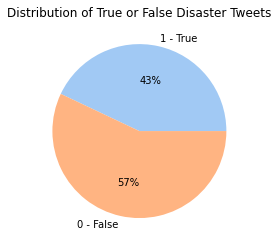

In [70]:
print("# ---- Distribution of True/False Values ---- #")

colors = sns.color_palette('pastel')[0:2]

plt.pie([sum(df['target'].values == 1), sum(df['target'].values == 0)], labels= ["1 - True", "0 - False"], colors=colors, autopct='%.0f%%', radius =1)
plt.title("Distribution of True or False Disaster Tweets")
plt.show()

                                                   text  target
0     Our Deeds are the Reason of this #earthquake M...       1
1                Forest fire near La Ronge Sask. Canada       1
2     All residents asked to 'shelter in place' are ...       1
3     13,000 people receive #wildfires evacuation or...       1
4     Just got sent this photo from Ruby #Alaska as ...       1
...                                                 ...     ...
7608  Two giant cranes holding a bridge collapse int...       1
7609  @aria_ahrary @TheTawniest The out of control w...       1
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1
7611  Police investigating after an e-bike collided ...       1
7612  The Latest: More Homes Razed by Northern Calif...       1

[3271 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


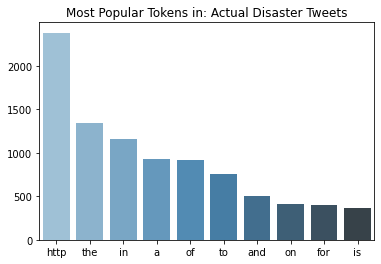

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


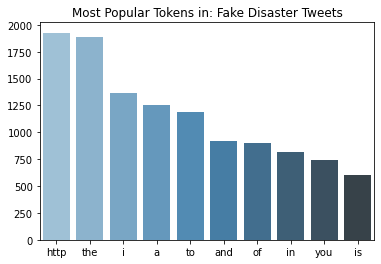

In [71]:
df_real = df[df['target'] == 1]
df_fake = df[df['target'] == 0]

print(df_real)

def create_tokens(df, type):
    new_list = list(word_tokenize(tweet.lower()) for tweet in df['text'])
    if type == 'words':
        flat = [token for sublist in new_list for token in sublist if token.isalnum()]
    else:
        flat = [token for sublist in new_list for token in sublist if not token.isalnum()]
    return flat

real_word_tokens = create_tokens(df_real, "words")
fake_word_tokens = create_tokens(df_fake, "words")

def most_popular(tokens, title):
    counts = Counter(tokens).most_common(10)
    x = [feature[0] for feature in counts]
    y = [feature[1] for feature in counts]

    sns.barplot(x, y, palette="Blues_d")
    plt.title("Most Popular Tokens in: " + title)
    plt.show()

most_popular(real_word_tokens, 'Actual Disaster Tweets')
most_popular(fake_word_tokens, 'Fake Disaster Tweets')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


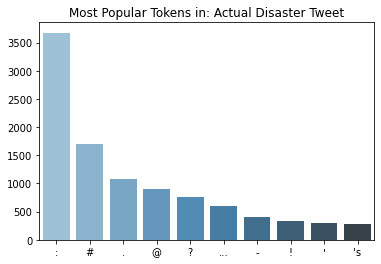

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


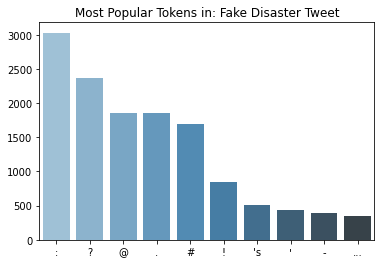

In [72]:
real_punct_tokens = create_tokens(df_real, "punct")
fake_punct_tokens = create_tokens(df_fake, "punct")

most_popular(real_punct_tokens, "Actual Disaster Tweet")
most_popular(fake_punct_tokens, "Fake Disaster Tweet")

In [73]:
def tweet_length_distribution():
    pass

def location_distribution(df, feature):
    sns.histplot(data=df, x=feature)

def keyword_distribution():
    pass

In [74]:
"""
TODO:
- Show top most popular words/tokens (disaster vs fake)
- Show punctuation distribution (disaster vs fake)
- Show the lengths of tweets (disaster vs fake)
- Location distribution (compare disaster vs fake)
- Keyword distribution (compare disaster vs fake)
"""

'\nTODO:\n- Show top most popular words/tokens (disaster vs fake)\n- Show punctuation distribution (disaster vs fake) \n- Show the lengths of tweets (disaster vs fake)\n- Location distribution (compare disaster vs fake)\n- Keyword distribution (compare disaster vs fake)\n'